In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 
import os 
from tqdm import tqdm 
from glob import glob 
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.manifold import MDS

# 커피 데이터 분석 
- 커피의 품질을 측정하기 위해 생산 뒤 다양한 요소가 측정이 됨 
- Quality Measures의 데이터를 이용해 커피가 생산된 지역, 고도, 회사 혹은 커피의 색, 생산방법 등의 유사도가 있는지 분석하고자 함 
- 생산된 이후의 데이터를 이용해 생산 과정에서의 여러 요소 유사도 분석 

## 전처리 

In [63]:
#데이터 로드 
df = pd.read_csv('./Datasets/merged_data_cleaned.csv')

### Feature 제거 
- 유사도 비교를 위한 Quality Features와 비교 대상을 위한 categorical columns만 남김 

In [64]:
#컬럼 정제 
#사용하고자 하는 Quality Column과 비교하고자 하는 Categorical Column만 남김 
quality_columns = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Sweetness','Moisture','Category.One.Defects']
categorical_columns = ['Species','Owner','Country.of.Origin','Altitude','altitude_high_meters','altitude_low_meters','Region','In.Country.Partner','Harvest.Year','Variety','Processing.Method']
df = df[quality_columns+categorical_columns]
df = df.dropna().reset_index(drop=True)
df_quality = df[quality_columns]
df_category = df[categorical_columns]

## Features 정제 
- 범주가 이상한 것들 정제 
- Altitude 만 정제 
- Altitude_low와 Altitude_high의 평균을 사용 

In [66]:
df_category['Altitude'] = (df_category['altitude_high_meters'] + df_category['altitude_low_meters'])/2

## Scaling 및 임베딩 
- quality_columns 은 Scaling (MinMax) 
- categorical_columns 은 Embedding 진행 


In [67]:
min_value = df_quality.min()
max_value = df_quality.max()
df_quality = (df_quality-min_value)/(max_value-min_value)

In [68]:
df = pd.concat([df_quality,df_category],axis=1).reset_index(drop=True)

In [69]:
class embed_dicts:
    __init__ = 0 

#ltitude는 임베딩
for column in ['Species','Owner','Country.of.Origin','Region','In.Country.Partner','Harvest.Year','Variety','Processing.Method']:
    #임베딩을 위한 dict 생성 
    embed_dict = {value:key for key,value in  enumerate(df_category[column].unique())}
    try:
        exec(f'embed_dicts.{column} = embed_dict') #라벨 임베딩 저장 
    except:
        column_ = column.replace('.','_')
        exec(f'embed_dicts.{column_} = embed_dict') #라벨 임베딩 저장 
    print(column)
    #임베딩 
    df[column] = df[column].apply(lambda x : embed_dict[x])
    


Species
Owner
Country.of.Origin
Region
In.Country.Partner
Harvest.Year
Variety
Processing.Method


## MDS 

In [70]:
input_x = np.array(df[quality_columns])
mds = MDS(n_components=2)
mds_x = mds.fit_transform(input_x)

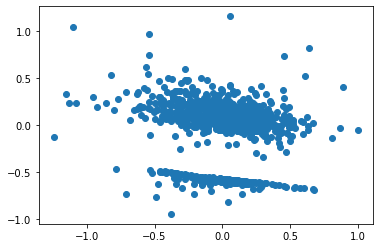

In [71]:
plt.scatter(x = mds_x[:,0],y=mds_x[:,1])
plt.show()

In [78]:
categorical_columns

['Species',
 'Owner',
 'Country.of.Origin',
 'Altitude',
 'altitude_high_meters',
 'altitude_low_meters',
 'Region',
 'In.Country.Partner',
 'Harvest.Year',
 'Variety',
 'Processing.Method']

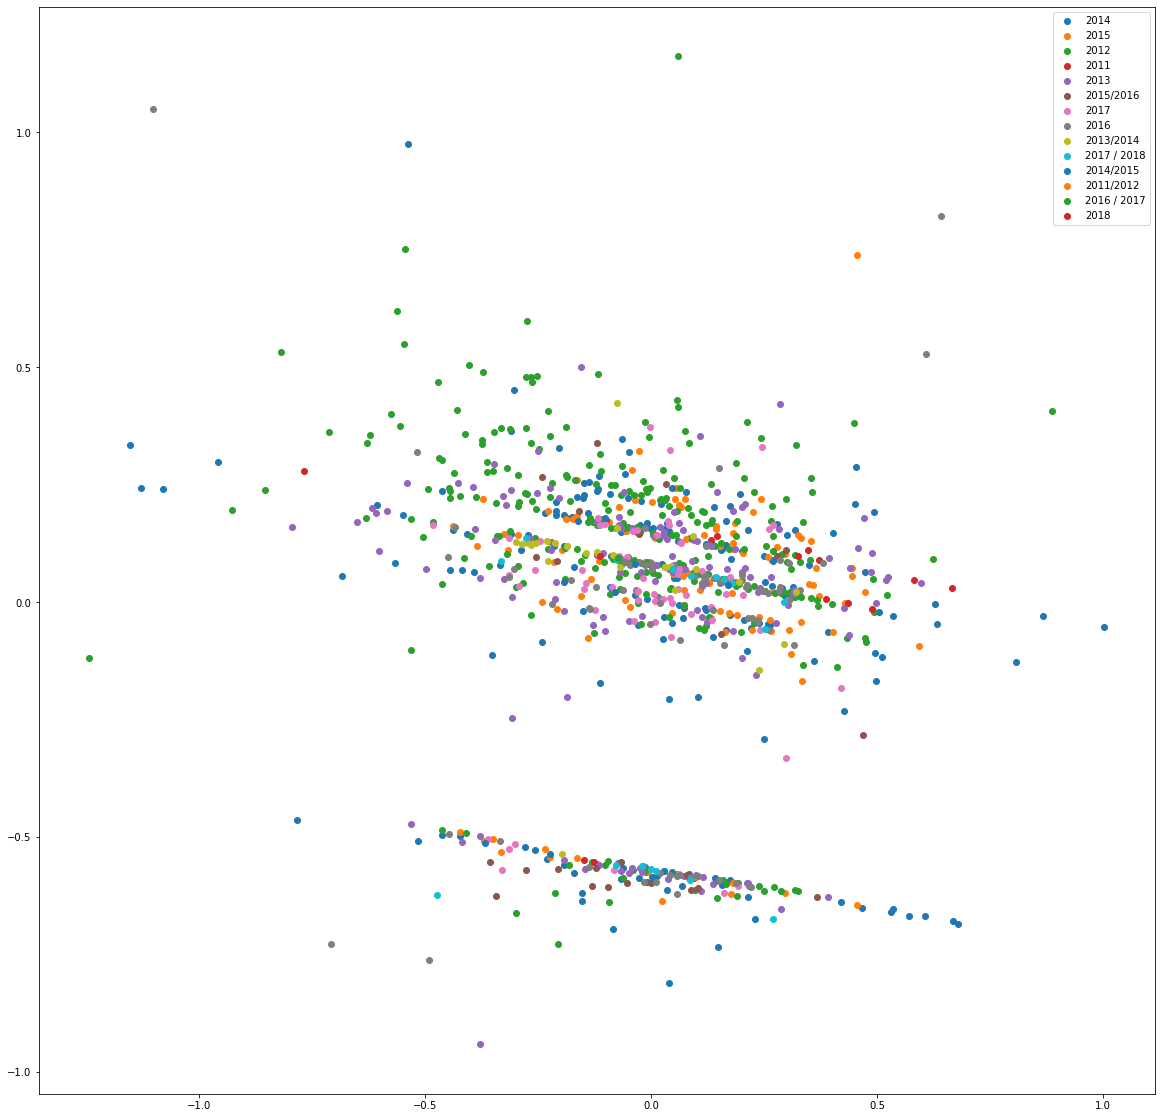

In [149]:
column = 'Harvest.Year'
try:
    exec(f'embedding = embed_dicts.{column}')
except:
    column = column.replace('.','_')
    exec(f'embedding = embed_dicts.{column}')
    column = column.replace('_','.')
embedding = {value:key for key,value in embedding.items()}

plt.figure(figsize=(20,20))
legends = df[column].unique()

for legend in legends:
    legend_x = mds_x[df[df[column]==legend].index]
    plt.scatter(x=legend_x[:,0],
                y=legend_x[:,1],
                label=f'{embedding[legend]}')
    plt.legend()

plt.show()
    